# Tunisia Real Estate Analysis

## Importing Libraries:

In [54]:
library(ggplot2)

## Data exploration:

### loading the dataset

In [36]:
data <- read.csv("dataset/tunisia-real-estate.csv",
stringsAsFactors = TRUE,
header = TRUE, dec = ".",
sep = ",")

### Viewing the structure of the dataset:

In [37]:
# View the Column Names
names(data)
# View the first few rows of the dataset
head(data)

# View the data Size
dim(data)

# View the structure of the dataset
str(data)

[1] "Governorate"         "Delegation"          "Locality"           
[4] "Nature"              "Type.of.Real.Estate" "Surface"            
[7] "Price"               "Inserted.On"

,Governorate,Delegation,Locality,Nature,Type.of.Real.Estate,Surface,Price,Inserted.On
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,Tunis,Sidi El Bechir,Sidi El Bechir,Sale,2-room apartment,70,120000,06/10/2023
2,Sousse,Akouda,Akouda,Sale,2-room apartment,74,230000,05/10/2023
3,Tunis,La Marsa,La Marsa,Rental,Houses,400,6500,30/10/2023
4,Tunis,Carthage,Carthage,Rental,Surfaces,180,1400,02/11/2023
5,Sousse,Hammam Sousse,Hammam Sousse,Sale,3-room apartment,145,160000,26/06/2022
6,Tunis,La Marsa,La Marsa,Rental,2-room apartment,120,1500,18/09/2023


[1] 25317     8

'data.frame':	25317 obs. of  8 variables:
 $ Governorate        : Factor w/ 24 levels "Ariana","Beja",..: 23 20 23 23 20 23 23 1 23 23 ...
 $ Delegation         : Factor w/ 193 levels "Agareb","Ain Draham",..: 169 4 112 26 79 112 48 5 3 115 ...
 $ Locality           : Factor w/ 193 levels "Agareb","Ain Draham",..: 169 4 112 26 79 112 48 5 3 115 ...
 $ Nature             : Factor w/ 7 levels "Land","Offices & Shops",..: 5 5 4 4 5 4 4 5 7 4 ...
 $ Type.of.Real.Estate: Factor w/ 15 levels "1-room apartment",..: 2 2 10 13 3 2 12 8 2 12 ...
 $ Surface            : num  70 74 400 180 145 ...
 $ Price              : num  120000 230000 6500 1400 160000 1500 300 570000 150 650 ...
 $ Inserted.On        : Factor w/ 1000 levels "01/01/2014","01/01/2022",..: 194 161 974 63 832 578 793 167 48 552 ...


## Data cleaning:

### Checking for missing values:

In [38]:
# Check for missing values in the entire dataset
any(is.na(data))

# Check for missing values in specific columns
colSums(is.na(data))

[1] FALSE

Governorate          Delegation            Locality              Nature 
                  0                   0                   0                   0 
Type.of.Real.Estate             Surface               Price         Inserted.On 
                  0                   0                   0                   0

- there is no missing values in the dataset.

### Checking for duplicates:

In [39]:
# Check for duplicated rows
duplicated_rows <- data[duplicated(data), ]

### Rmeoving duplicates:

In [40]:
# Remove duplicated rows
data <- unique(data)

### Converting data types:

In [41]:
# Convert columns to appropriate data types
data$Price <- as.numeric(data$Price)
# Convert Date/Time columns
data$Inserted.On <- as.POSIXct(data$Inserted.On, format = "%Y-%m-%d %H:%M:%S")

## Descriptive Analysis:

### Summary Statistics for Price Variable:

In [42]:
# Summary statistics for price
summary(data$Price)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       2     1500   100000   422246   428000 16000000 

### Summary Statistics for Surface Variable:

In [43]:

summary(data$Surface)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0       90      179     9902      460 32000000 

### Frequency Table for Categorical Variables (Governorate, Delegation, Locality):

In [44]:
# Frequency table for Governorate
table_governorate <- table(data$Governorate)
print(table_governorate)

# Frequency table for Nature
table_nature <- table(data$Nature)
print(table_nature)

# Frequency table for Locality
table_type_of_real_estate <- table(data$Type.of.Real.Estate)
print(table_type_of_real_estate)


     Ariana        Beja   Ben arous     Bizerte       Gabes       Gafsa 
       4605          86        2458         500          54          34 
   Jendouba    Kairouan   Kasserine      Kebili      Le Kef      Mahdia 
         35          18          13           3          69          95 
    Manouba    Medenine    Monastir      Nabeul        Sfax Sidi bouzid 
        512         153         167        5878         452          22 
    Siliana      Sousse   Tataouine      Tozeur       Tunis    Zaghouan 
         25        1378           6           9        8561         184 

           Land Offices & Shops        Purchase          Rental            Sale 
           4779            1860               2            9338            8966 
        Sharing Vacation rental 
             16             356 

         1-room apartment          2-room apartment          3-room apartment 
                     1716                      2941                      3595 
         4-room apartment 5

## Data Visualization:

### Pie Plot for Governorate Variable

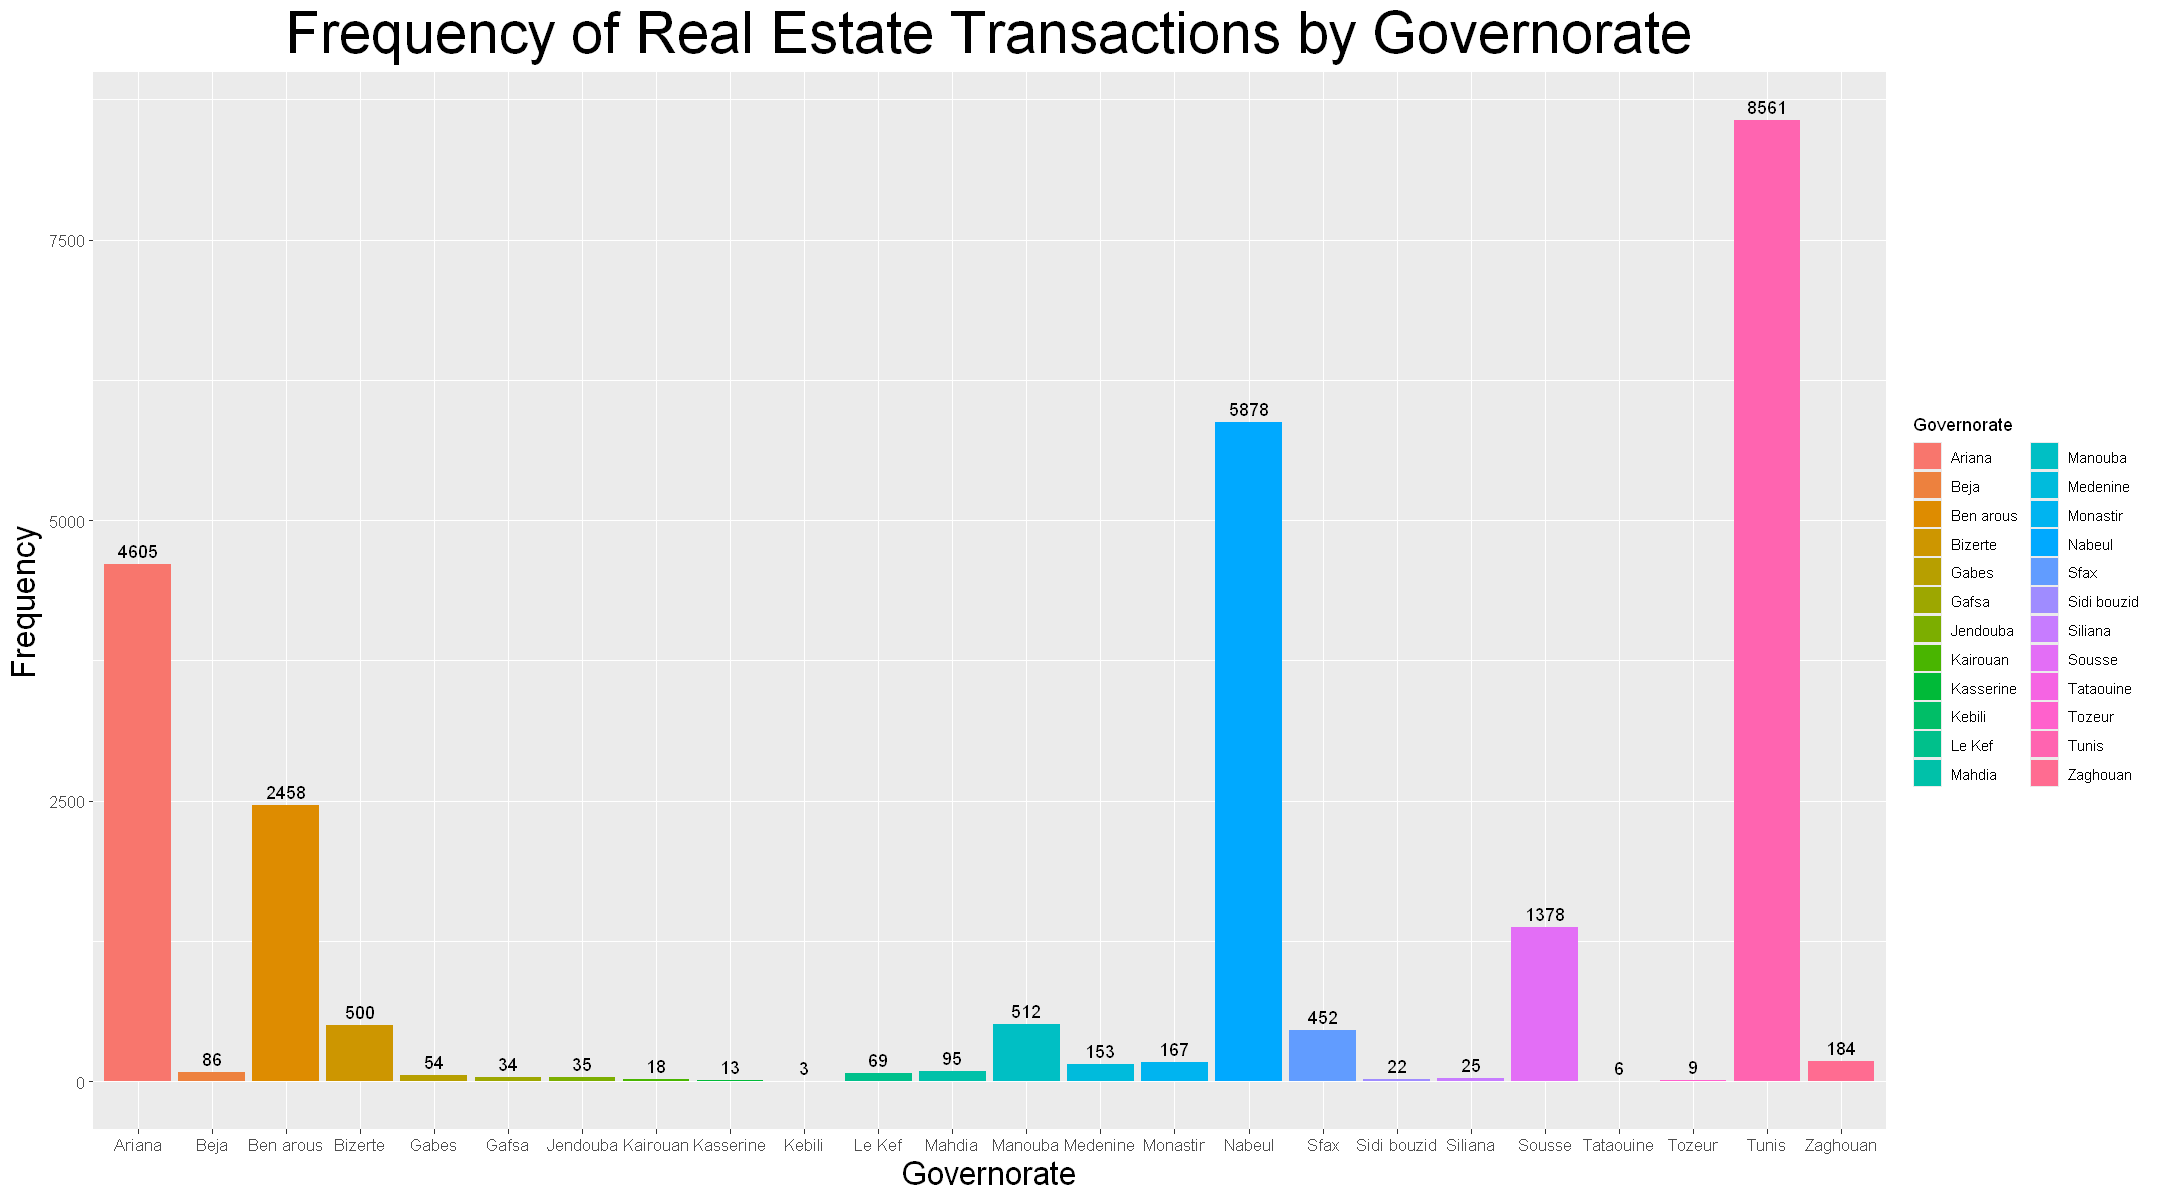

In [71]:
# Set the default size of plots
options(repr.plot.width=18, repr.plot.height=10)

# Bar plot for Governorate
plot_governorate <- ggplot(data, aes(x = Governorate, y = after_stat(count), fill = Governorate)) +
  geom_bar(stat = "count", width = 0.9) +
  geom_text(stat = 'count', aes(label = ..count..), vjust = -0.5) +
  theme(axis.text.x = element_text(hjust = 0.5)) +
  ggtitle("Frequency of Real Estate Transactions by Governorate") +
  xlab("Governorate") +
  ylab("Frequency")+
  theme(axis.text = element_text(size = 10),
        axis.title = element_text(size = 20),
        plot.title = element_text(size = 35,hjust = 0.5))

plot_governorate

# Save the pie chart for Governorate as an image
ggsave("plots/Frequency of Real Estate Transactions by Governorate.png", plot_governorate, width = 18, height = 10)

> Insights:
- from this plot, we can conclude that the most real estate transactions are done within these four governorates:
    - Tunis by 8561
    - Nabeul by 5876
    - Ariana by 4605
    - Ben Arous by 2458
> from now on, we will focus our analysis on **these four governorates**.

### Box Plot for Numerical Variable (Price) by Governorate:

Warning message:
"Removed 818 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 818 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


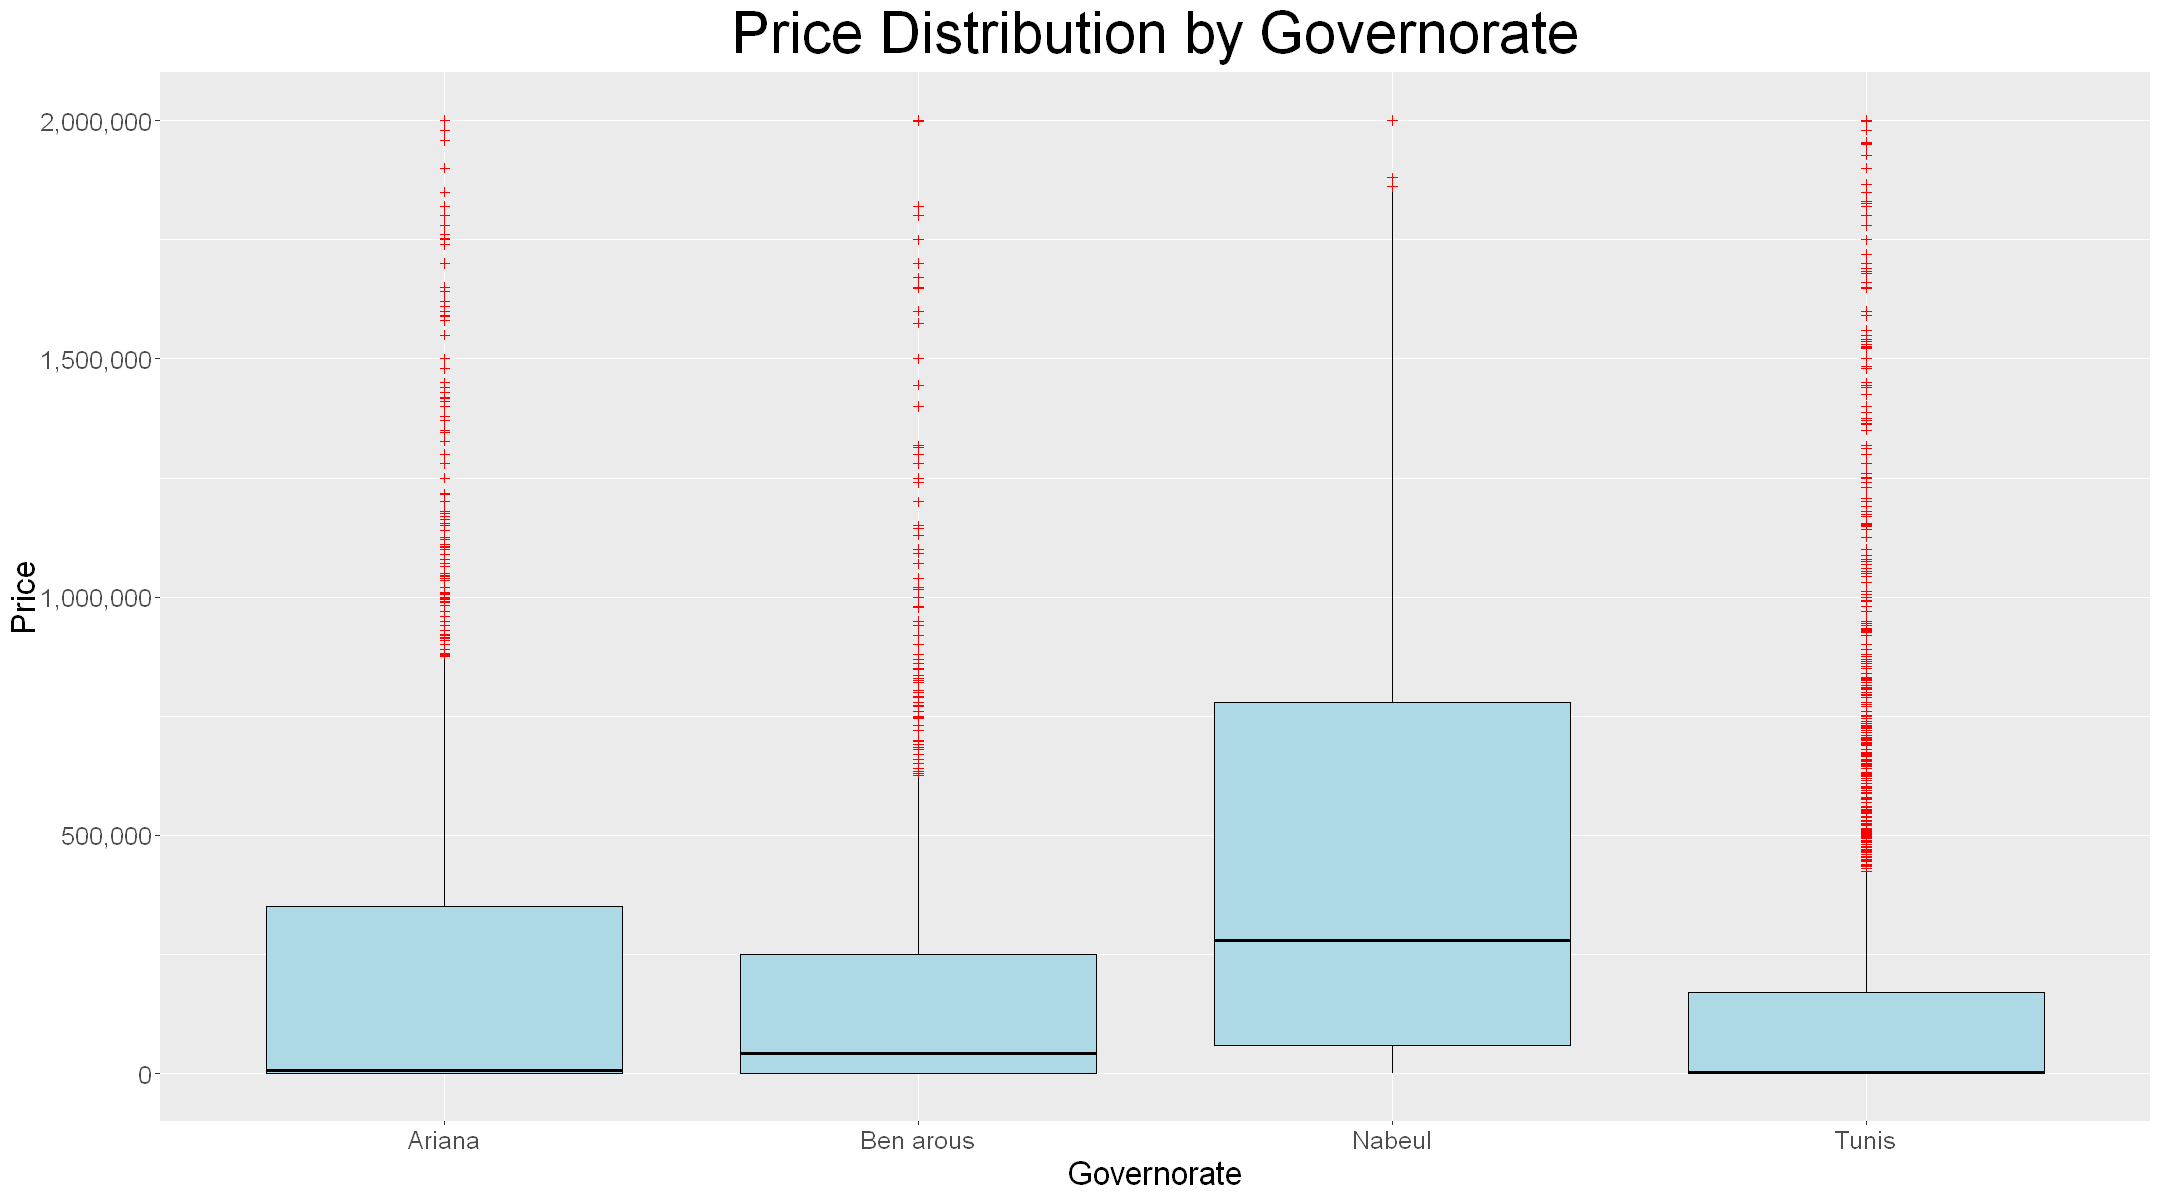

In [46]:
# making a subset for the mentioned governorates only
sub_set = subset(data, Governorate %in% c("Tunis", "Ben arous", "Nabeul", "Ariana"))

plot_price <- ggplot(sub_set, aes(x = Governorate, y = Price)) +
  geom_boxplot(outlier.shape = 3,  # Use a different shape for outliers
               outlier.color = "red",  # Use a different color for outliers
               fill = "lightblue",  # Use a different fill color for the boxes
               color = "black")+  # Use a different color for the box outlines
  ggtitle("Price Distribution by Governorate") +
  xlab("Governorate") +
  ylab("Price") +
  scale_y_continuous(labels = scales::comma, limits = c(0, 2000000)) +
  theme(axis.text = element_text(size = 15),
        axis.title = element_text(size = 20),
        plot.title = element_text(size = 35,hjust = 0.5))

plot_price

# Save the box plot with custom dimensions
ggsave("plots/box_plot_price_governorate.png",
plot_price,width = 18, height = 10)


> Insights:
- from this plot we can conclude some few things:
    - **Ariana and Ben Arous** : Both have similar price distributions with some outliers, indicating a stable property market.
    - **Nabeul** : Exhibits a higher median price with outliers, suggesting a more expensive property market with some very high-priced properties.
    - **Tunis** : Has a lower median price but many high-priced outliers, indicating a wide range of property prices.

### Filtering data only for the specified governorates:

In [47]:
# Filter data for only the specified Governorates
data_tunis <- subset(data, Governorate == "Tunis")
data_ariana <- subset(data, Governorate == "Ariana")
data_ben_arous <- subset(data, Governorate == "Ben arous")
data_nabeul <- subset(data, Governorate == "Nabeul")

> now we will start analysing each governorate seperatly

### The Governorate of Tunis:

#### Nature of real estates:

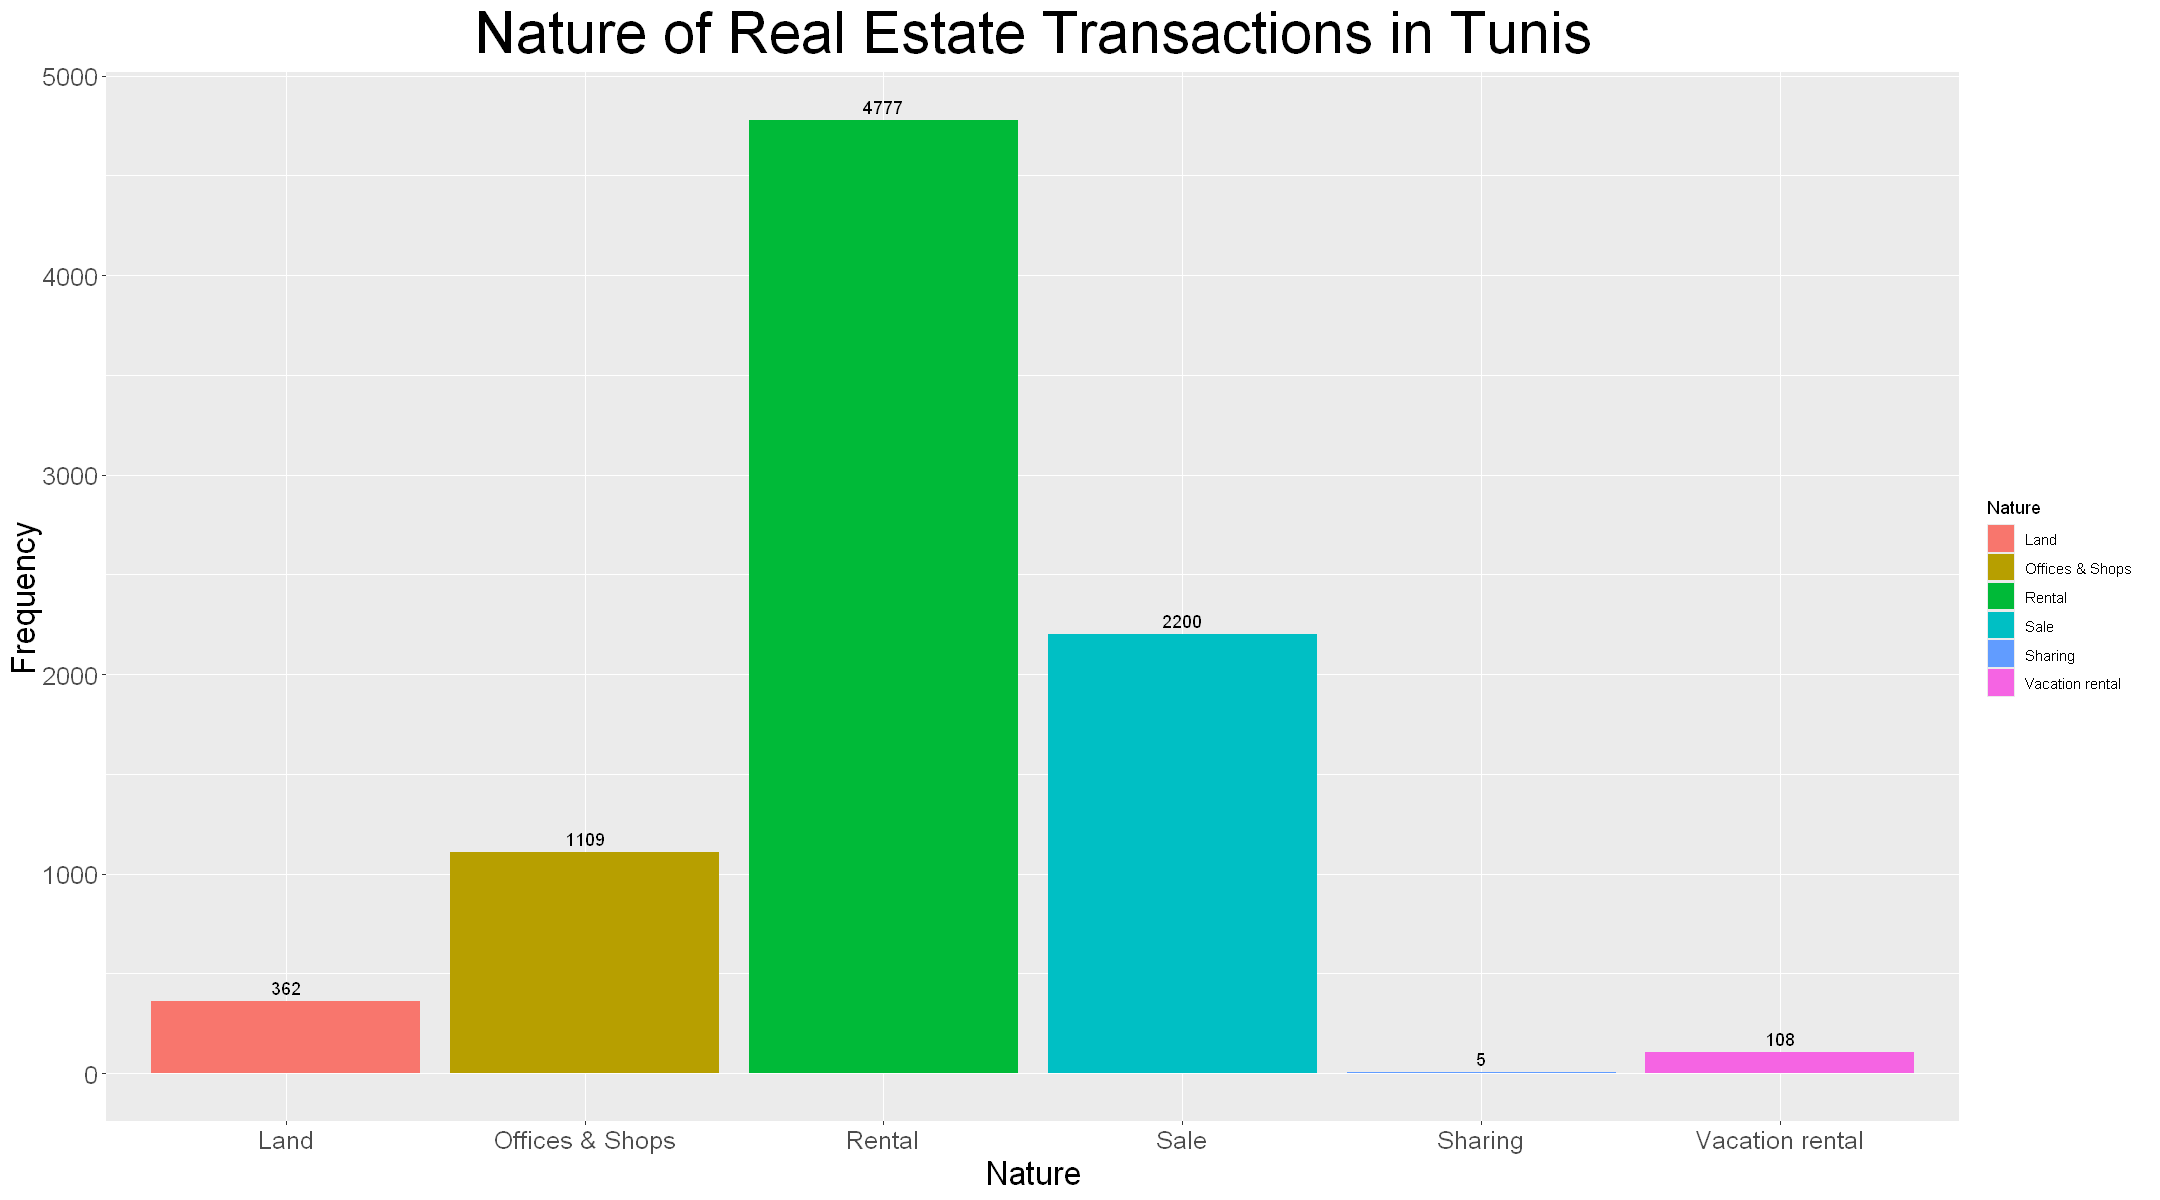

In [50]:
# Bar plot for Nature of Real Estate Transactions in Tunis
tunis_nature_plot <- ggplot(data_tunis, aes(x = Nature, fill = Nature)) +
  geom_bar(stat = "count", width = 0.9) +
  geom_text(stat = 'count', aes(label = ..count..), vjust = -0.5) +
  ggtitle("Nature of Real Estate Transactions in Tunis") +
  xlab("Nature") +
  ylab("Frequency")+
  theme(axis.text.x = element_text(hjust = 0.5),
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 20),
        plot.title = element_text(size = 35,hjust = 0.5))

tunis_nature_plot

# Save the bar plot for Nature of Real Estate Transactions in Tunis
ggsave("plots/Nature of Real Estate Transactions in Tunis.png", tunis_nature_plot, width = 18, height = 10)

> Insights:
- from this plot we can conclude that the **rental** Nature Control the most real estate Transactions in the Tunis Governorate by nearly 4,800 transactions , followed by **Sale** with 2,200 Transactions and **Offices & Shops** with 1109 Transactions. we can also notice the absence of the **Sharing** and **Vacation-rental** natures with less than 150 Transactions.

#### Types of real estates:

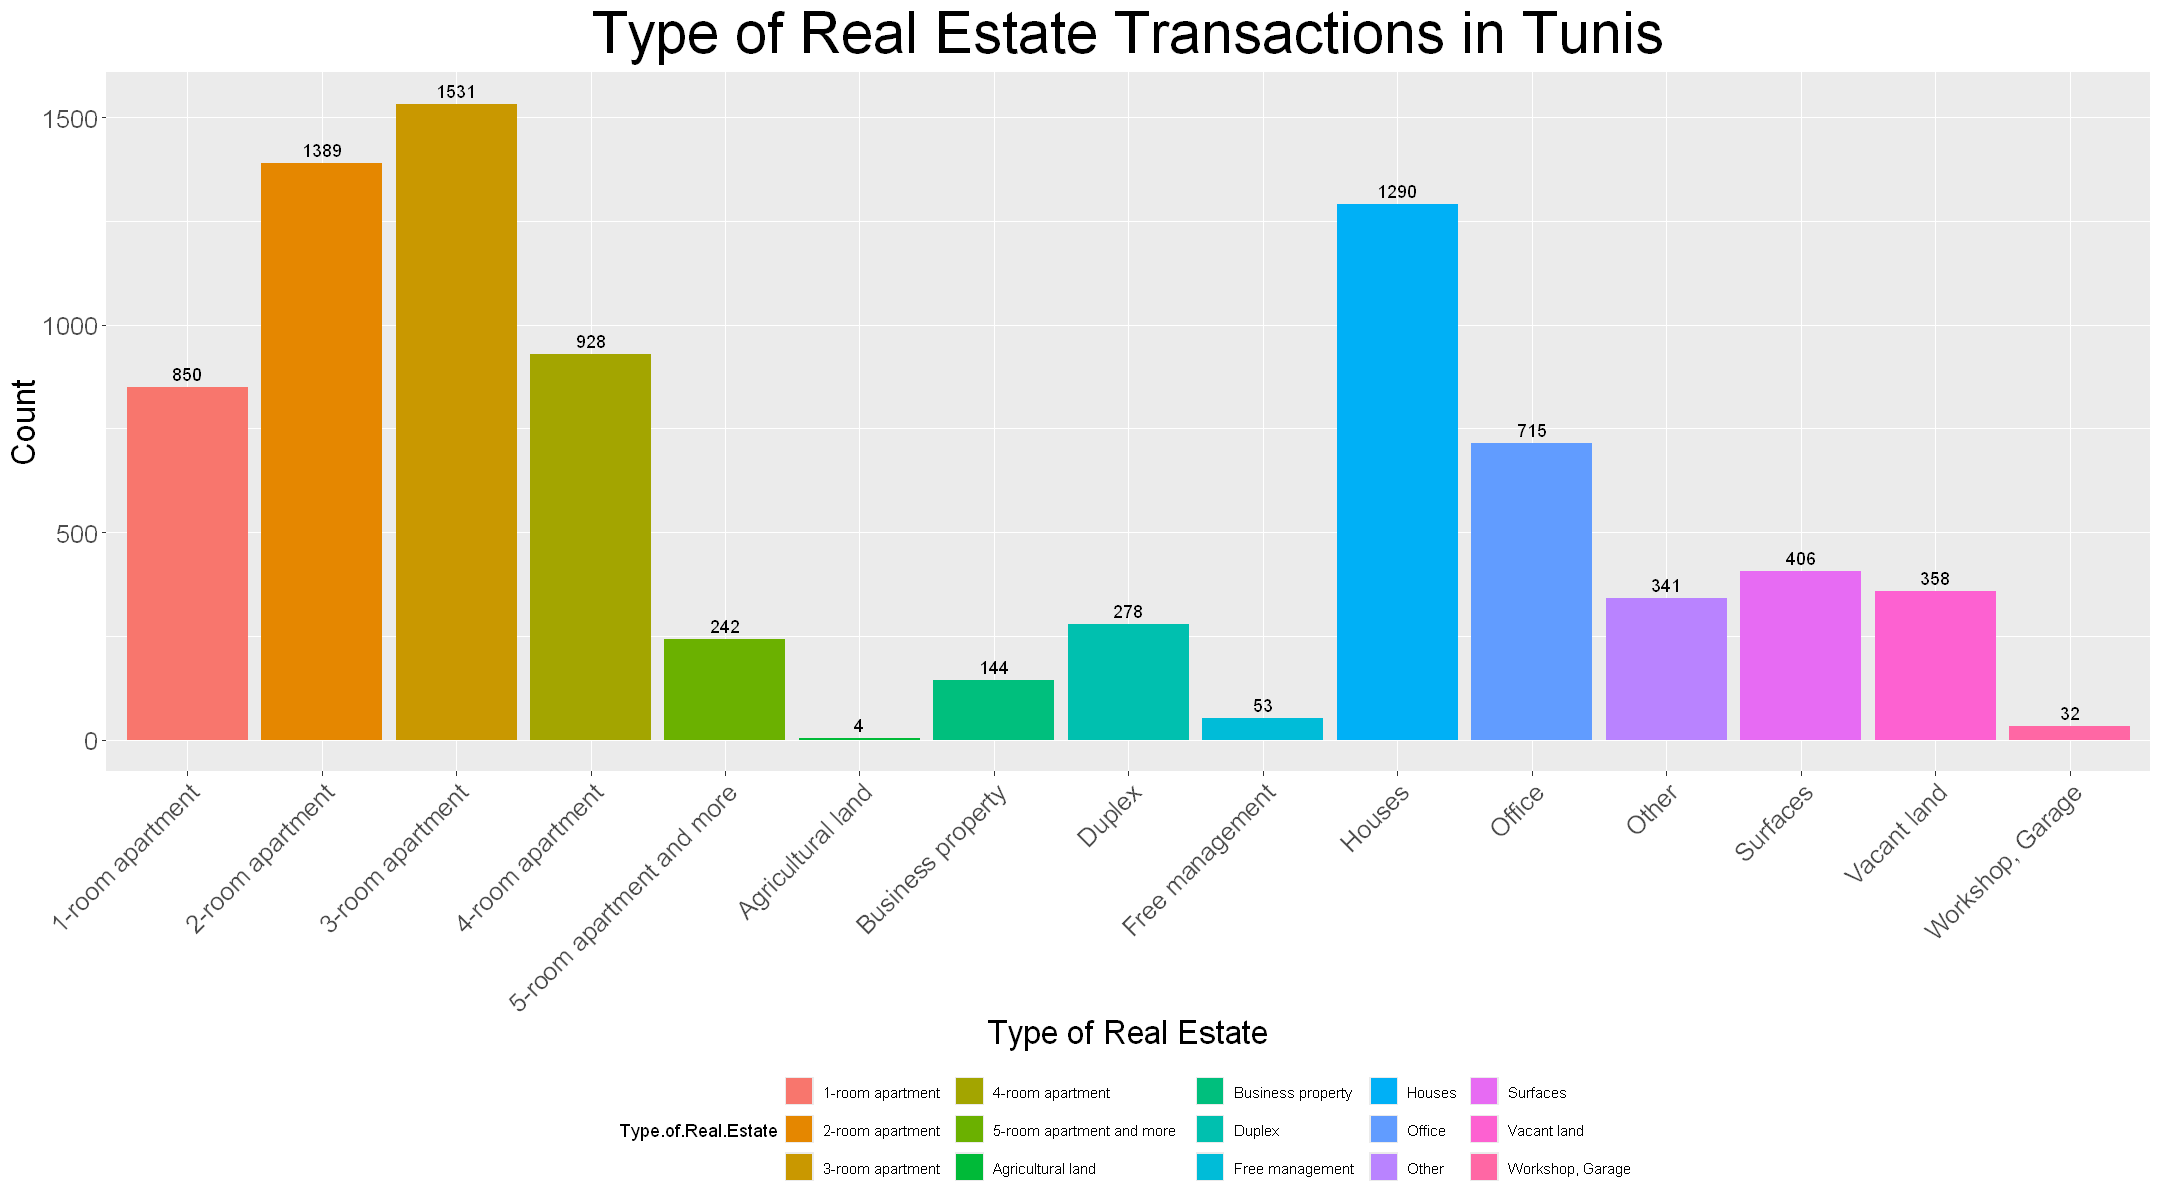

In [67]:
tunis_type_of_estate_bar_plot <- ggplot(data_tunis, aes(x = Type.of.Real.Estate, fill = Type.of.Real.Estate)) +
  geom_bar(stat = "count", width = 0.9) +
  geom_text(stat = 'count', aes(label = ..count..), vjust = -0.5) +
  ggtitle("Type of Real Estate Transactions in Tunis") +
  xlab("Type of Real Estate") +
  ylab("Count") +
  theme(legend.position = "bottom",
        axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels for better readability
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 20),
        plot.title = element_text(size = 35, hjust = 0.5))

tunis_type_of_estate_bar_plot

# Save the pie chart for Type of Real Estate Transactions in Tunis
ggsave("plots/Type of Real Estate Transactions in Tunis.png", tunis_type_of_estate_pie_plot, width = 18, height = 10)

> Insights :
- from this plot we can see that the **appartement categorie** is the most common transaction type in the Tunis Governorate with a total of 4,940 transactions followed by **Houses** and **Office** with 1,290 and 716 transactions respectively. we can also find other types of transactions that are less common in this governorate with less than 450 transactions such as **Surfaces** , **Vacant land** , **Other** .

#### mean prices of houses by delegation:

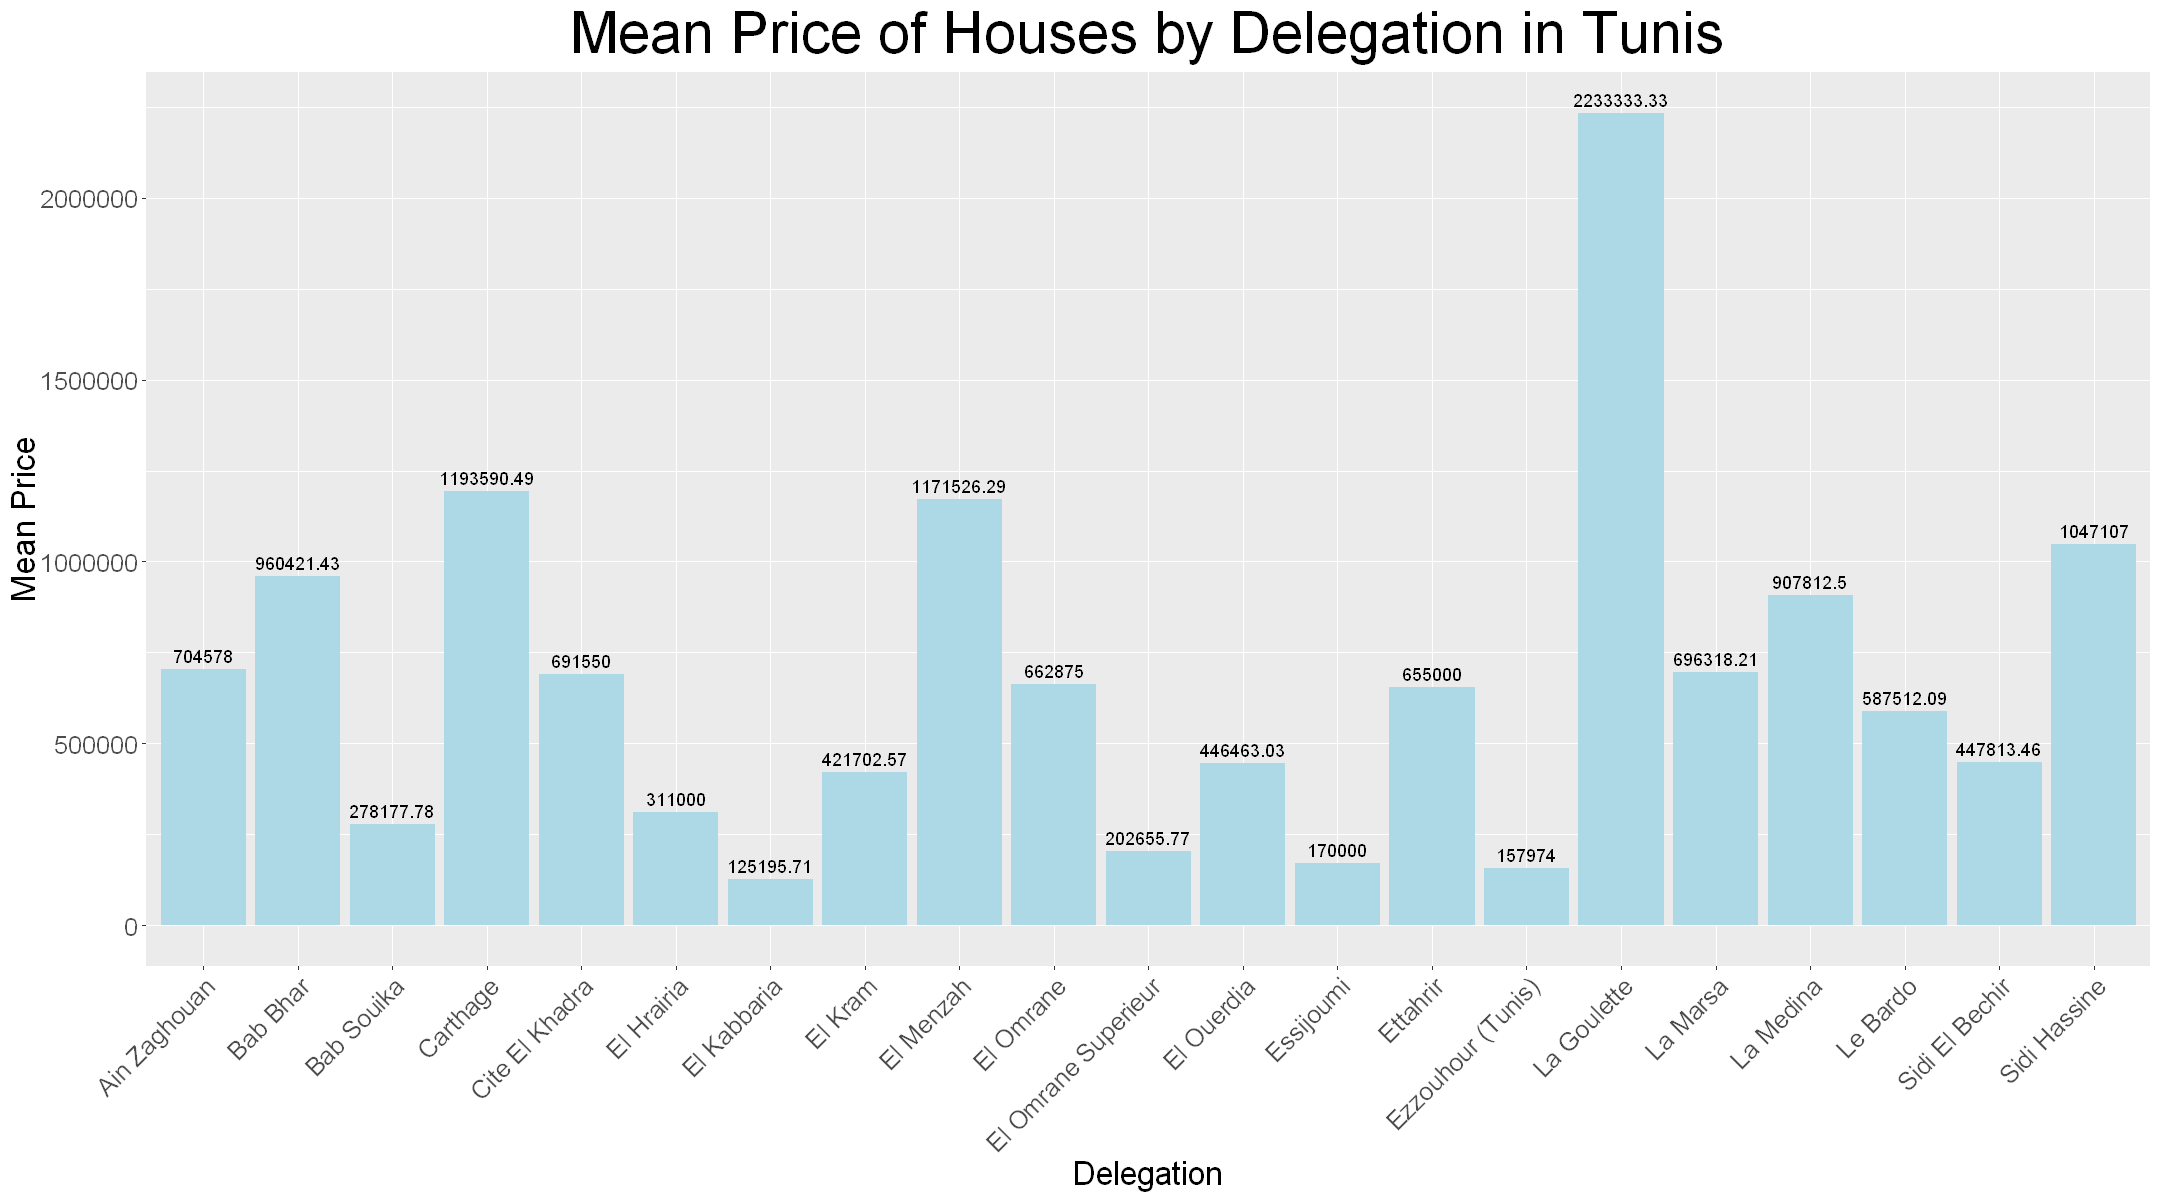

In [73]:
# Filter data for only "Houses" type of real estate
data_tunis_houses <- subset(data_tunis, Type.of.Real.Estate == "Houses")

# Calculate mean price by delegation for Houses only
tunis_mean_price_by_delegation_houses <- aggregate(Price ~ Delegation, data = data_tunis_houses, FUN = mean)
tunis_mean_price_by_delegation_houses <- tunis_mean_price_by_delegation_houses[order(tunis_mean_price_by_delegation_houses$Price, decreasing = TRUE), ]

# Create the bar plot for mean price by delegation for Houses only
tunis_mean_price_by_delegation_houses_bar_plot <- ggplot(tunis_mean_price_by_delegation_houses, aes(x = Delegation, y = Price)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  geom_text(aes(label = round(Price, 2)), vjust = -0.5) +
  ggtitle("Mean Price of Houses by Delegation in Tunis") +
  xlab("Delegation") +
  ylab("Mean Price") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels for better readability
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 20),
        plot.title = element_text(size = 35, hjust = 0.5))

tunis_mean_price_by_delegation_houses_bar_plot

# Save the bar plot for Mean Price of Real Estate Transactions by Delegation in Tunis
ggsave("plots/Mean Price of Real Estate Transactions by Delegation in Tunis.png", tunis_mean_price_by_delegation_houses_bar_plot, width = 18, height = 10)

> Insights:
- from this plot, we can conclude that the delegation of **La Goulette** have the highest priced houses with a mean of 2,233,333.33 TND followed by both **Carthage** and **El Menzah** with a mean price respectivily of 1,193,590.49 TND and 1,171,526.29 TND. we can also notice some delegations that have a price mean close to 1,000,000 TND like **La Medina**,**Sidi Hassine** and **BAB Bhar**, and at the bottom we have **El Kabbaria**,**Essijoumi** and **Ezzouhour** with a price mean that doesn't surpass 200,000 TND.

### The Governorate of Nabeul: